### Import PyTorch

In [11]:
import torch
from torch import nn

torch.manual_seed(42)
torch.cuda.manual_seed(42)
print(torch.__version__)

2.7.1+cu128


### Import torchvision

In [12]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

print(torchvision.__version__)

0.22.1+cu128


### Check CUDA enabled

In [13]:
print("Torch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)
if torch.cuda.is_available():
    print("Device count:", torch.cuda.device_count())
    print("GPU name:", torch.cuda.get_device_name(0))

device = "cuda" if torch.cuda.is_available() else "cpu"
device

Torch version: 2.7.1+cu128
Torchvision version: 0.22.1+cu128
CUDA available: True
CUDA version: 12.8
Device count: 1
GPU name: NVIDIA GeForce RTX 3060 Laptop GPU


'cuda'

### PyTorch Computer Vision

#### Libraries
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models
* `torchvision.transforms` - function for manipulating vision data (images) 
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset

### Get Data

In [14]:
from torchvision import datasets

train_data = datasets.FashionMNIST(
    root="data",   # path to download data to
    train=True,   # fetch training dataset
    download=True,   # download dataset locally
    transform=torchvision.transforms.ToTensor(),   # data transformation method 
    target_transform=None   # label transformation
)

test_data = datasets.FashionMNIST(
    root="data",   
    train=False,   # fetch testing dataset
    download=True,   
    transform=torchvision.transforms.ToTensor(),   
)

In [15]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [16]:
class_names = train_data.classes
class_idx = train_data.class_to_idx

class_names, class_idx

(['T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'],
 {'T-shirt/top': 0,
  'Trouser': 1,
  'Pullover': 2,
  'Dress': 3,
  'Coat': 4,
  'Sandal': 5,
  'Shirt': 6,
  'Sneaker': 7,
  'Bag': 8,
  'Ankle boot': 9})

In [17]:
# Look at first training example
image, label = train_data[0]

print(f"Image shape: {image.shape} -> [color channels, height, width]")
print(f"Image label: {class_names[label]}")

train_data[0]

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image label: Ankle boot


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

### Visualize Data

Image shape: torch.Size([1, 28, 28])
Image label: Ankle boot


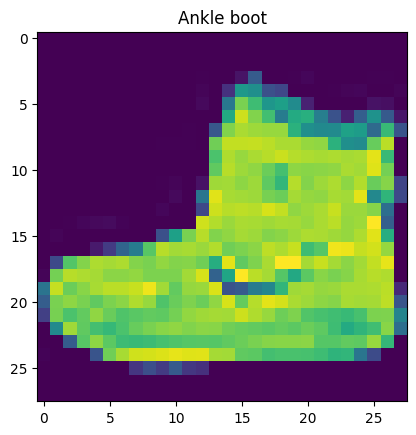

In [18]:
import matplotlib.pyplot as plt

print(f"Image shape: {image.shape}")
print(f"Image label: {class_names[label]}")

plt.title(class_names[label])
plt.imshow(image.squeeze())

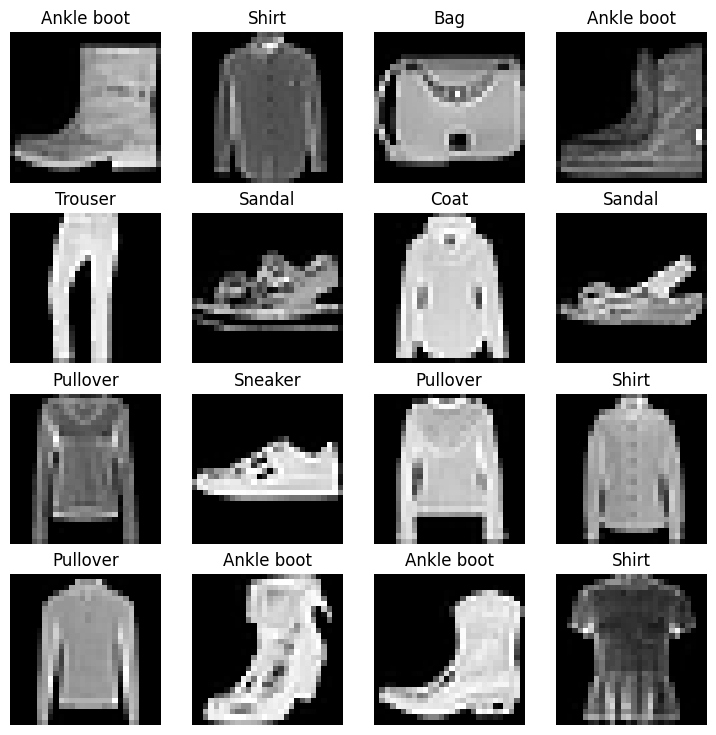

In [19]:
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4

for i  in range(1, rows*cols + 1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.title(class_names[label])
    plt.imshow(image.squeeze(), cmap="gray")
    plt.axis(False)


### Divide data into batches using Dataloader

 The PyTorch DataLoader class `torch.utils.data.Dataloader()` loads data from a dataset and creates mini-batches for training models. <br>
 DataLoader allows for computationally efficient training and also allows users to apply transformations to the data.


In [20]:
from torch.utils.data import DataLoader

# Batch size hyperparameter
BATCH_SIZE = 32   # default batch size is 1

# Turn dataset into batches
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [21]:
print(f"Length of train_dataloader: {len(train_dataloader)} batches of size {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of size {BATCH_SIZE}")

Length of train_dataloader: 1875 batches of size 32
Length of test_dataloader: 313 batches of size 32


In [22]:
# Look at one batch of the training dataset
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


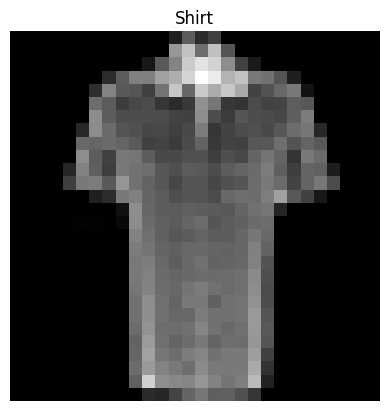

In [23]:
# Look at one random example in one of the batches
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

### Build model

In [39]:
class MNISTModel(nn.Module):
    def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
        super().__init__()
        
        self.conv_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 7 * 7,
                      out_features=output_shape)
        )
        
    def forward(self, x):
        x = self.conv_1(x)
        x = self.conv_2(x)
        x = self.classifier(x)
        return x


In [52]:
model = MNISTModel(input_shape=1,
                   hidden_units=10,
                   output_shape=len(class_names)).to(device)
model

MNISTModel(
  (conv_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Train model

In [53]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.1)

# Number of epochs (loops)
epochs = 10

# Accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

In [54]:
# from tqdm.auto import tqdm

train_loss_values = []
test_loss_values = []
epoch_count =[]

# Build training and evaluation loop
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n--------")
    ### Training
    train_loss, train_acc = 0, 0
    model.to(device)
    
    for batch, (X, y) in enumerate(train_dataloader):
        model.train()
        # Put data on GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss   # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1))

        # 3. Zero the gradients of the optimizer
        optimizer.zero_grad()

        # 4. Perform backpropagation on the loss with respect to parameters of the model
        loss.backward()

        # 5. Step the optimizer (perform gradient descent)
        optimizer.step()

        if batch % 300 == 0:
            print(f"Completed batch {batch} | Looked at {batch * len(X)} samples")
        
    # Calculate average training loss per batch
    train_loss /= len(train_dataloader)
    train_loss_values.append(train_loss)

    # Calculate average training accuracy per batch
    train_acc /= len(train_dataloader)

    ### Testing
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()
    
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            # 1. Forward pass
            test_pred = model(X_test)

            # 2. Calculate accumulated loss
            test_loss += loss_fn(test_pred, y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test,
                                    y_pred=test_pred.argmax(dim=1))
        
        # Calculate average test loss per batch
        test_loss /= len(test_dataloader)
        test_loss_values.append(test_loss)

        # Calculate average training accuracy per batch
        test_acc /= len(test_dataloader)

        print(f"Train loss:{train_loss:.5f} | Train acc: {train_acc}%")
        print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")

    epoch_count.append(epoch)
    

Epoch: 0
--------
Completed batch 0 | Looked at 0 samples
Completed batch 300 | Looked at 9600 samples
Completed batch 600 | Looked at 19200 samples
Completed batch 900 | Looked at 28800 samples
Completed batch 1200 | Looked at 38400 samples
Completed batch 1500 | Looked at 48000 samples
Completed batch 1800 | Looked at 57600 samples
Train loss:0.57644 | Train acc: 79.465%
Test loss: 0.39462 | Test acc: 85.96%
Epoch: 1
--------
Completed batch 0 | Looked at 0 samples
Completed batch 300 | Looked at 9600 samples
Completed batch 600 | Looked at 19200 samples
Completed batch 900 | Looked at 28800 samples
Completed batch 1200 | Looked at 38400 samples
Completed batch 1500 | Looked at 48000 samples
Completed batch 1800 | Looked at 57600 samples
Train loss:0.35967 | Train acc: 86.95333333333333%
Test loss: 0.32746 | Test acc: 88.44%
Epoch: 2
--------
Completed batch 0 | Looked at 0 samples
Completed batch 300 | Looked at 9600 samples
Completed batch 600 | Looked at 19200 samples
Completed ba

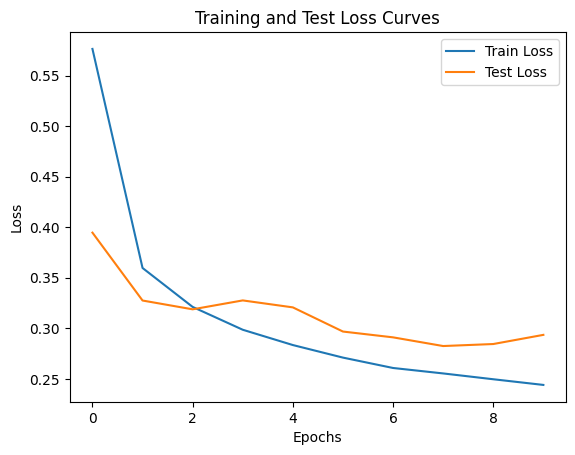

In [55]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


### Make prediction

In [ ]:
# Function to make prediction with the MNISTModel 
def make_predictions(model: torch.nn.Module, 
                     data: list, 
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) 

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) 

            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [58]:
import random

random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [64]:
pred_probs = make_predictions(model=model,
                              data=test_samples)
pred_classes = pred_probs.argmax(dim=1)

pred_probs, pred_classes

(tensor([[3.5459e-09, 1.6145e-10, 1.2794e-10, 3.6862e-12, 1.0750e-12, 9.9999e-01,
          3.3566e-08, 2.4049e-08, 1.9817e-07, 8.7950e-06],
         [8.7251e-02, 8.4871e-01, 2.6418e-03, 4.4379e-02, 1.0881e-02, 1.9569e-05,
          5.7140e-03, 4.7413e-05, 2.6173e-04, 9.2697e-05],
         [1.3099e-05, 2.2360e-08, 1.4882e-07, 1.7425e-06, 8.4930e-09, 2.9402e-04,
          1.6905e-06, 4.5841e-01, 3.2570e-04, 5.4096e-01],
         [2.5913e-04, 1.5913e-05, 2.2821e-01, 4.3445e-05, 7.6896e-01, 1.1453e-07,
          2.4888e-03, 2.2042e-07, 2.4809e-05, 1.4933e-06],
         [3.4195e-01, 1.4631e-06, 1.1884e-03, 6.5041e-01, 4.7246e-03, 8.9831e-07,
          1.5784e-03, 3.9522e-05, 2.2389e-05, 8.9098e-05],
         [7.9422e-01, 2.7830e-06, 2.9109e-04, 1.3245e-04, 1.7587e-03, 1.2225e-09,
          2.0321e-01, 3.4077e-07, 3.7929e-04, 2.7644e-08],
         [1.2693e-03, 3.3959e-06, 4.8101e-01, 1.9531e-05, 3.9747e-01, 8.5870e-08,
          1.1946e-01, 1.5517e-08, 7.6613e-04, 3.5894e-06],
         [9.6

### Visualize predictions

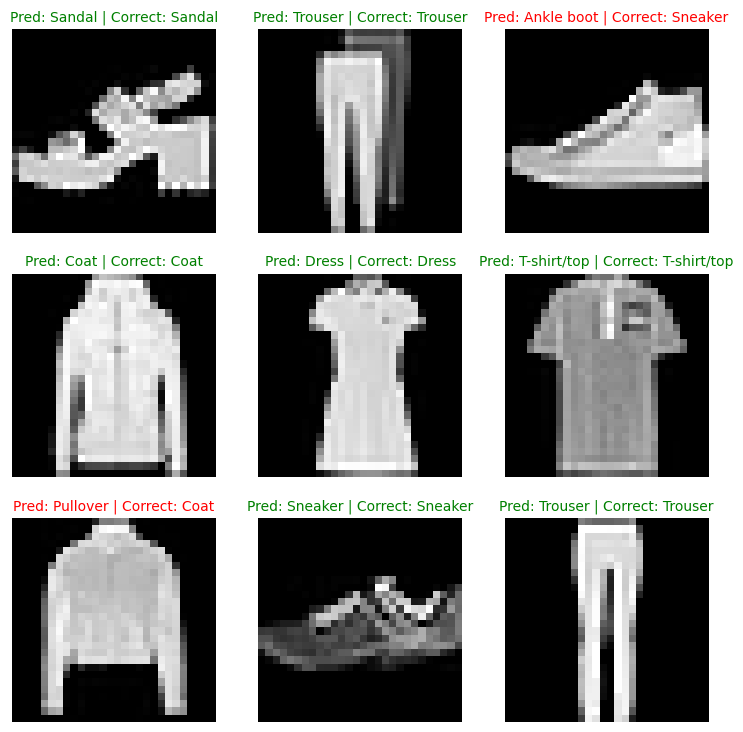

In [ ]:
plt.figure(figsize=(9, 9))

for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(3, 3, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  correct_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Correct: {correct_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == correct_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
      
  plt.axis(False)